In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
root_dir = './dataset' 
number_of_images = {}

for dir in os.listdir(root_dir):
    number_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

In [ ]:
number_of_images

{'.ipynb_checkpoints': 0, 'Healthy': 1360, 'Sick': 1355}

In [ ]:
os.rmdir('/content/dataset/.ipynb_checkpoints')

In [ ]:
def data_folder(path, split):
    if not os.path.exists('./' + path):
        os.mkdir('./' + path)
    
        for dir in os.listdir(root_dir):
            os.makedirs('./' + path + '/' + dir)
            for img in np.random.choice(a = os.listdir(os.path.join(root_dir, dir)), size = (math.floor(split * number_of_images[dir]) - 5), replace=False):
                original = os.path.join(root_dir, dir, img)
                destination = os.path.join('./' + path, dir)
                shutil.copy(original, destination)
                os.remove(original)
    else:
        print('Folder exist already')

In [ ]:
data_folder('train', 0.7)

In [ ]:
data_folder('validation', 0.15)

In [ ]:
data_folder('test', 0.15)

In [5]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
import keras

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (630,630,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.3))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.3))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 628, 628, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 628, 628, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 626, 626, 36)      5220      
                                                                 
 batch_normalization_1 (Batc  (None, 626, 626, 36)     144       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 313, 313, 36)     0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def preprocess_images(path):
    # data augmentation
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(630, 630), batch_size=32, class_mode='binary')
    return image

In [ ]:
path = './train'
train_data = preprocess_images(path)

Found 1889 images belonging to 2 classes.


In [ ]:
def preprocess_test_images(path):
    # data augmentation
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(630, 630), batch_size=32, class_mode='binary')
    return image

In [ ]:
path = './test'
test_data = preprocess_test_images(path)

Found 397 images belonging to 2 classes.


In [ ]:
path = './validation'
validation_data = preprocess_test_images(path)

Found 397 images belonging to 2 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
    monitor='val_accuracy'
)
check_point = ModelCheckpoint(
    monitor='val_accuracy',
    save_best_only=True,
    mode='auto',
    filepath='./model.h5'
)
callbacks = [early_stopping, check_point]

In [23]:
history = model.fit_generator(
    generator=train_data, 
    steps_per_epoch=46, 
    epochs=30, 
    verbose=1, 
    validation_data=validation_data, 
    validation_steps=13, 
    callbacks=callbacks
)

Epoch 1/30
46/46 [==============================] - 195s 4s/step - loss: 0.6783 - accuracy: 0.7037 - val_loss: 4.0134 - val_accuracy: 0.5013
Epoch 2/30
46/46 [==============================] - 165s 4s/step - loss: 0.5517 - accuracy: 0.7303 - val_loss: 1.9405 - val_accuracy: 0.5013
Epoch 3/30
46/46 [==============================] - 164s 4s/step - loss: 0.5559 - accuracy: 0.7283 - val_loss: 0.8356 - val_accuracy: 0.5038
Epoch 4/30
46/46 [==============================] - 165s 4s/step - loss: 0.4878 - accuracy: 0.7670 - val_loss: 0.7413 - val_accuracy: 0.5416
Epoch 5/30
46/46 [==============================] - 164s 4s/step - loss: 0.4050 - accuracy: 0.8175 - val_loss: 0.9154 - val_accuracy: 0.5567
Epoch 6/30
46/46 [==============================] - 162s 4s/step - loss: 0.3713 - accuracy: 0.8459 - val_loss: 1.1506 - val_accuracy: 0.5869
Epoch 7/30
46/46 [==============================] - 163s 4s/step - loss: 0.3222 - accuracy: 0.8619 - val_loss: 0.7043 - val_accuracy: 0.6625
Epoch 8/30
46

In [24]:
history

In [28]:
hs = history.history

Text(0.5, 1.0, 'Accuracy vs Validation Accuracy')

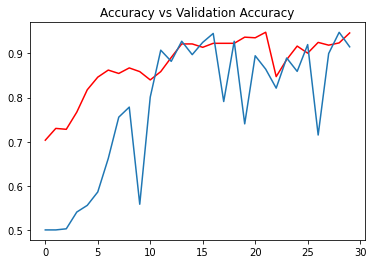

In [29]:
plt.plot(hs['accuracy'], c = 'red')
plt.plot(hs['val_accuracy'])
plt.title('Accuracy vs Validation Accuracy')

Text(0.5, 1.0, 'Loss vs Validation Loss')

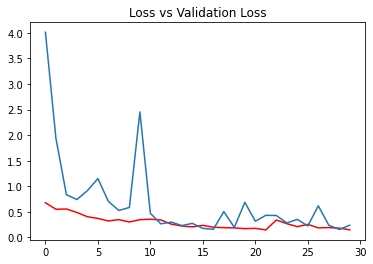

In [30]:
plt.plot(hs['loss'], c = 'red')
plt.plot(hs['val_loss'])
plt.title('Loss vs Validation Loss')

In [8]:
from keras.models import load_model
model2 = load_model('./model.h5')

In [64]:
acc = model2.evaluate_generator(test_data)[1]
print(f'Accuracy : {acc * 100}%')

Accuracy : 50.1259446144104%


In [33]:
train_data.class_indices

{'Healthy': 0, 'Sick': 1}

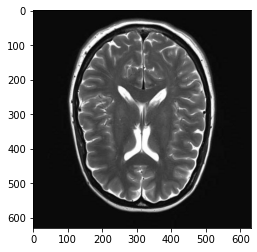

In [9]:
# some prediction 
path = './train/Healthy/No12.jpg'
img = load_img(path, target_size=(630,630))
plt.imshow(img)
input_arr = img_to_array(img)/255.0
input_arr = np.expand_dims(input_arr, axis = 0)
plt.show()

In [10]:
pred = (model2.predict(input_arr) > 0.5).astype("int32")
pred[0][0]

if pred == 0:
  print('Healthy')
else:
  print('Sick')  

Healthy


### Trying Style transfer  

In [47]:
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model

In [48]:
def preprocess_images_transfer(path):
    # data augmentation
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True, preprocessing_function=preprocess_input)
    image = image_data.flow_from_directory(directory=path, target_size=(630, 630), batch_size=32, class_mode='binary')
    return image

In [49]:
def preprocess_test_images_transfer(path):
    # data augmentation
    image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
    image = image_data.flow_from_directory(directory=path, target_size=(630, 630), batch_size=32, class_mode='binary')
    return image

In [51]:
path = './train'
train_data = preprocess_images_transfer(path)

Found 1889 images belonging to 2 classes.


In [52]:
path = './test'
test_data = preprocess_images_transfer(path)

Found 397 images belonging to 2 classes.


In [53]:
path = './validation'
validation_data = preprocess_images_transfer(path)

Found 397 images belonging to 2 classes.


In [54]:
transfer_model = MobileNet(input_shape=(630,630,3), include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [55]:
for layer in transfer_model.layers:
  layer.trainable = False

In [56]:
transfer_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 630, 630, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 315, 315, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 315, 315, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 315, 315, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 315, 315, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 315, 315, 32)     128       
 ation)                                         

In [58]:
X = Flatten()(transfer_model.output)
X = Dense(units=1, activation='sigmoid')(X)
model3 = Model(transfer_model.input, X)

early = EarlyStopping(
    monitor='val_accuracy',
    patience = 1,
    min_delta = 0.01,
    verbose = 1,
    mode= 'auto'
)
checkpoint = ModelCheckpoint(
    monitor='val_accuracy',
    save_best_only=True,
    mode='auto',
    filepath='./transfer_model.h5',
    verbose = 1
)

callbacks = [early, checkpoint]

In [59]:
model3.compile(optimizer='rmsprop', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [60]:
history2 = model3.fit_generator(generator=train_data, 
    steps_per_epoch=46, 
    epochs=30, 
    verbose=1, 
    validation_data=validation_data, 
    validation_steps=13, 
    callbacks=callbacks
)

Epoch 1/30
46/46 [==============================] - ETA: 0s - loss: 25.0558 - accuracy: 0.5468
Epoch 1: val_accuracy improved from -inf to 0.55919, saving model to ./transfer_model.h5
46/46 [==============================] - 173s 4s/step - loss: 25.0558 - accuracy: 0.5468 - val_loss: 15.6305 - val_accuracy: 0.5592
Epoch 2/30
46/46 [==============================] - ETA: 0s - loss: 16.1574 - accuracy: 0.6031
Epoch 2: val_accuracy improved from 0.55919 to 0.70277, saving model to ./transfer_model.h5
46/46 [==============================] - 164s 4s/step - loss: 16.1574 - accuracy: 0.6031 - val_loss: 5.0135 - val_accuracy: 0.7028
Epoch 3/30
45/46 [============================>.] - ETA: 2s - loss: 16.2683 - accuracy: 0.6021
Epoch 3: val_accuracy did not improve from 0.70277
46/46 [==============================] - 163s 4s/step - loss: 16.2808 - accuracy: 0.6017 - val_loss: 70.7998 - val_accuracy: 0.5013
Epoch 3: early stopping


In [61]:
acc2 = model3.evaluate_generator(test_data)[1]
acc2

0.501259446144104